# Data analysis of amazon top 50 selling books

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")


import warnings
warnings.filterwarnings("ignore")


In [3]:
data=pd.read_csv("bestsellers with categories.csv")

In [4]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [6]:
data.shape

(550, 7)

In [7]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [9]:
data.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [10]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

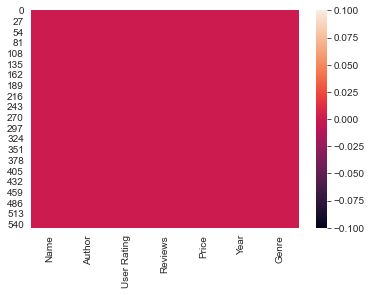

In [11]:
sns.heatmap(data.isnull())
plt.show()

In [12]:
data.median()

User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

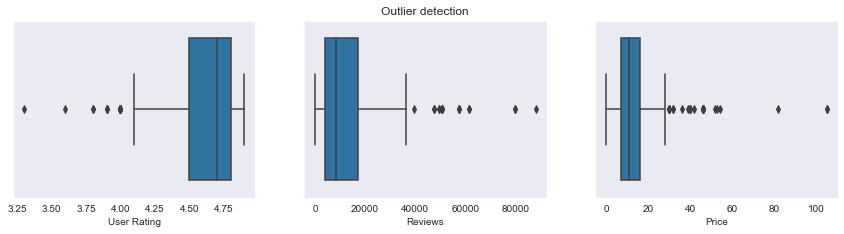

In [13]:
#Outlier detection

plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])
plt.title("Outlier detection")


plt.subplot(4,4,3)
sns.boxplot(data['Price'])


plt.show()

In [14]:
data['Price'] = data['Price'].clip(lower = data['Price'].quantile(0.05), upper=data['Price'].quantile(0.95))

In [15]:
data['User Rating'] = data['User Rating'].clip(lower = data['User Rating'].quantile(0.05), upper=data['User Rating'].quantile(0.95))

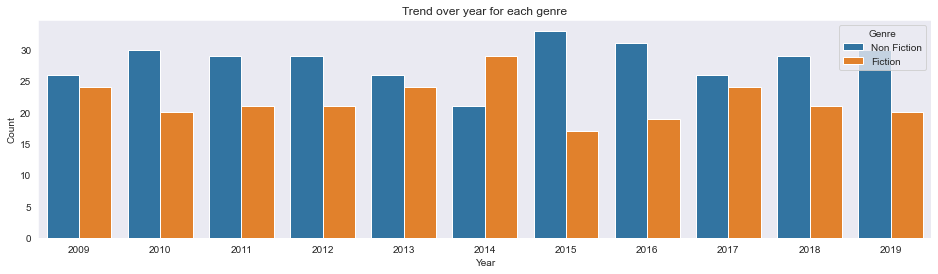

In [16]:
plt.figure(figsize=(16,4))

sns.countplot(data['Year'], data=data, hue='Genre')
plt.ylabel("Count")
plt.title("Trend over year for each genre")

plt.show()